# Kan training

## install + imports

### imports

In [ ]:
from kan import KAN
from kan import MultKAN
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import os

os.makedirs('/pictures', exist_ok=True)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Dataset and preprocessing

In [ ]:
# read train and test data
train = pd.read_csv('/content/drive/MyDrive/KAN/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/KAN/mnist_test.csv')

In [ ]:
from torchvision import transforms
# convert data to numpy arrays
x_train = train.drop('label', axis=1).values
x_test = test.drop('label', axis=1).values
y_train = train['label'].values
y_test = test['label'].values

# set target size to scale images
target_size = 8

# define transformation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((target_size, target_size)),
    transforms.ToTensor()
])

# transform the data
def transform_images(images):
    transformed_images = []
    for image in images:
        image = image.reshape(28, 28).astype(np.uint8)
        image = transform(image)
        image = image.view(-1)
        transformed_images.append(image)
    return torch.stack(transformed_images)

train_input = transform_images(x_train)
test_input = transform_images(x_test)
train_label = torch.tensor(y_train, dtype=torch.int64)
test_label = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
train_input.shape, test_input.shape, train_label.shape, test_label.shape

(torch.Size([60000, 4]),
 torch.Size([10000, 4]),
 torch.Size([60000]),
 torch.Size([10000]))

In [ ]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [ ]:
# Convert labels to Long tensors
dataset['train_label'] = dataset['train_label'].long()
dataset['test_label'] = dataset['test_label'].long()

In [ ]:
dataset['train_input'] = train_input.to(device)
dataset['test_input'] = test_input.to(device)
dataset['train_label'] = train_label.to(device)
dataset['test_label'] = test_label.to(device)

## Model init

In [ ]:
#Parameter
hidden_1 = 3
hidden_2 = 0
steps = 5
grid = 3
k = 3
seed = 42
input_dim = train_input.shape[ 1 ]   # Anzahl der Eingabefunktionen
output_dim = 10   # Anzahl der Klasse

#Count
if hidden_2>0:
    Parameter = (hidden_1*input_dim+hidden_1*hidden_2+hidden_2*output_dim)*(grid+k+2)
    print(f"Parameter count = {Parameter}")
else:
    Parameter = hidden_1*(input_dim+output_dim)*(grid+k+2)
    print(f"Parameter count = {Parameter}")

Parameter count = 336


In [ ]:

model = KAN(width=[input_dim, hidden_1, output_dim], grid= grid , k= k , seed= seed)  # Vereinfachte Modellkonfiguratio5

checkpoint directory created: ./model
saving model version 0.0


## Training

In [ ]:
def train_acc():
  return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())


results = model.fit(dataset, opt="LBFGS", steps=steps, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss(),update_grid=False)

| train_loss: 1.30e+00 | test_loss: 1.30e+00 | reg: 3.08e+01 | : 100%|█| 5/5 [00:10<00:00,  2.05s/it


saving model version 0.1


## Results

In [ ]:
results

{'train_loss': [array(1.4315519, dtype=float32),
  array(1.3900088, dtype=float32),
  array(1.322975, dtype=float32),
  array(1.3044728, dtype=float32),
  array(1.2956475, dtype=float32)],
 'test_loss': [array(1.4321853, dtype=float32),
  array(1.3930345, dtype=float32),
  array(1.3273453, dtype=float32),
  array(1.3122492, dtype=float32),
  array(1.3034865, dtype=float32)],
 'reg': [array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(0., dtype=float32),
  array(30.810028, dtype=float32)],
 'train_acc': [0.23466666042804718,
  0.28698334097862244,
  0.36373332142829895,
  0.37533333897590637,
  0.3811500072479248],
 'test_acc': [0.22939999401569366,
  0.2865999937057495,
  0.3621000051498413,
  0.37130001187324524,
  0.38089999556541443]}

In [ ]:
train_loss = results['train_loss']

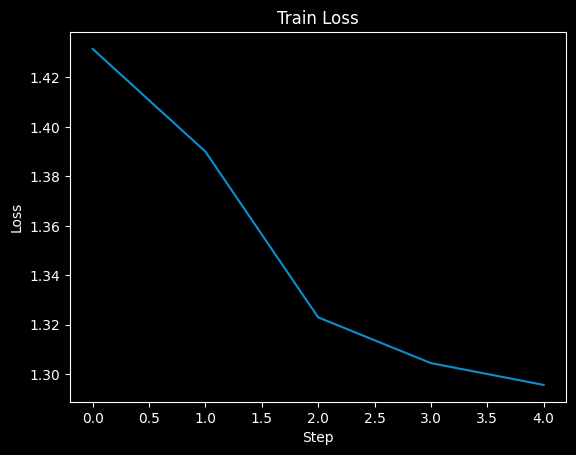

In [ ]:
# Linienfarbe
line_color = [0.047058823529411764, 0.5568627450980392, 0.8235294117647058]

# Plotten
plt.figure(facecolor='black')  # Schwarzer Hintergrund
plt.plot(train_loss, color=line_color)

# Anpassen der Plot-Elemente für schwarzen Hintergrund
plt.gca().set_facecolor('black')  # Hintergrund der Plotfläche
plt.gca().tick_params(colors='white')  # Achsenfarben
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().xaxis.label.set_color('white')

plt.title('Train Loss', color='white')
plt.xlabel('Step', color='white')
plt.ylabel('Loss', color='white')

# Anzeigen des Plots
plt.show()

## Save

In [ ]:
#save
model.saveckpt(f'/content/drive/MyDrive/KAN/Modelle/mini/model_mnist_h:{hidden_1}_s:{steps}_g:{grid}_k:{k}')

## Pruning

In [ ]:
model.plot(beta=3, scale=5,folder="/pictures/", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_h:{hidden_1}_s:{steps}_g:{grid}_k:{k}")

In [ ]:
model.prune_edge()

In [ ]:
train_acc()

In [ ]:
test_acc()

In [ ]:
model.plot(beta=3, scale=5,folder="/kaggle/working/pictures/", out_vars=['0','1','2','3','4','5','6','7','8','9'], title = f"KAN_h:{hidden_1}_s:{steps}_g:{grid}_k:{k}")

### Saving model_prune

In [ ]:
#save
model.saveckpt(f'/content/drive/MyDrive/KAN/Modelle/model_mnist_prune_edge_h:{hidden_1}_s:{steps}_g:{grid}_k:{k}')